In [1]:
from CoolProp.CoolProp import PropsSI
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def Function(T_evp, ref1, ref2):
    Qevp = 10000
    Tevp = T_evp + 273.16
    Tcond = 45 + 273.16
    T_LTC = -15 + 273.16
    Tsuperheat = 0
    Tsubcool = 0
    effcompL = .8

    T1 = Tevp + Tsuperheat   #Superheating
    # P1 = PropsSI('P', 'T', Tevp, 'Q', 1, ref1)
    # H1 = PropsSI('H', 'P', P1, 'T', T1, ref1)
    # S1 = PropsSI('S', 'P', P1, 'T', T1, ref1)
    P1 = PropsSI('P', 'T', T1, 'Q', 1, ref1)
    H1 = PropsSI('H', 'T', T1, 'Q', 1, ref1)
    S1 = PropsSI('S', 'T', T1, 'Q', 1, ref1)

    T3 = T_LTC
    T3sub = T_LTC - Tsubcool       #Subcooling

    P3 = PropsSI('P', 'T', T3, 'Q', 0, ref1)
    H3 = PropsSI('H', 'T', T3, 'Q', 0, ref1)
    S3 = PropsSI('S', 'T', T3, 'Q', 0, ref1)

    P3sub = PropsSI('P', 'T', T3sub, 'Q', 0, ref1)
    H3sub = PropsSI('H', 'T', T3sub, 'Q', 0, ref1)
    S3sub = PropsSI('S', 'T', T3sub, 'Q', 0, ref1)


    H4sub = H3sub
    T4sub = Tevp
    P4sub = P1
    S4sub = PropsSI('S', 'P', P4sub, 'H', H4sub, ref1)

    P2 = P3
    S2s = S1
    H2s = PropsSI('H', 'P', P2, 'S', S2s, ref1)
    H2 = H1 + ((H2s - H1) / effcompL)
    S2 = PropsSI('S', 'P', P2, 'H', H2, ref1)
    T2 = PropsSI('T', 'P', P2, 'H', H2, ref1)



    Tevp_HTC = T_LTC - 5
    T5 = Tevp_HTC + Tsuperheat   #Superheating
    P5 = PropsSI('P', 'T', T5, 'Q', 1, ref2)
    H5 = PropsSI('H', 'T', T5, 'Q', 1, ref2)
    S5 = PropsSI('S', 'T', T5, 'Q', 1, ref2)

    T7 = Tcond
    T7sub = Tcond - Tsubcool       #Subcooling

    P7 = PropsSI('P', 'T', T7, 'Q', 0, ref2)
    H7 = PropsSI('H', 'T', T7, 'Q', 0, ref2)
    S7 = PropsSI('S', 'T', T7, 'Q', 0, ref2)
    P7sub = PropsSI('P', 'T', T7sub, 'Q', 0, ref2)
    H7sub = PropsSI('H', 'T', T7sub, 'Q', 0, ref2)
    S7sub = PropsSI('S', 'T', T7sub, 'Q', 0, ref2)


    H8sub = H7sub
    T8sub = Tevp
    P8sub = P5
    S8sub = PropsSI('S', 'P', P8sub, 'H', H8sub, ref2)

    P6 = P7
    S6s = S5
    H6s = PropsSI('H', 'P', P6, 'S', S6s, ref2)
    H6 = H5 + ((H6s - H5) / effcompL)
    S6 = PropsSI('S', 'P', P6, 'H', H6, ref2)
    T6 = PropsSI('T', 'P', P6, 'H', H6, ref2)

    # print("Temperature     ", "Pressure     ", "Enthalpy     ", "Entropy")
    # print(T5, " ", P5, " ", H5, " ", S5)
    # print(T6, " ", P6, " ", H6, " ", S6)
    # print(T7, " ", P7, " ", H7, " ", S7)
    # print(T7sub, " ", P7sub, " ", H7sub, " ", S7sub)
    # print(T8sub, " ", P8sub, " ", H8sub, " ", S8sub)



    #Flow Rates:
    #LTC
    mLTC = Qevp / (H1 - H4sub)

    #HTC
    mHTC = (mLTC * (H2 - H3)) / (H5 - H8sub)

    #Compressor Work:
    #LTC
    wLTC = mLTC * (H2 - H1)

    #HTC
    wHTC = mHTC * (H6 - H5)

    #Total Compressor Work
    W_total = wLTC + wHTC

    #COP
    COP = (Qevp / W_total)
    COPL = Qevp / wLTC
    COPH = (mHTC * (H5 - H8sub)) / (wHTC)
    
    
    #Exergy Analysis
    Ta = 25 + 273 #ambient Temperature
    X_evp = Ta * ((mLTC * (S1 - S4sub)) - (Qevp/(Tevp + 5)))
    X_compl = Ta * mLTC * (S2 - S1)
    X_CHX = Ta * ((mLTC * (S3sub - S2)) + (mHTC * (S5 - S8sub)))
    X_EV1 = Ta * mLTC * (S4sub - S3sub)
#     X_comph = Ta * mHTC * (S6 - S5)
    X_comph = Ta * mHTC * (S5 - S6)
#     Qcond = mHTC * (H7sub - H6)
    Qcond = mHTC * (H6 - H7sub)
    X_cond = Ta * ((mHTC * (S7sub - S6)) + (Qcond/Ta))
    X_EV2 = Ta * mHTC * (S8sub - S7sub)
    X_total = X_compl + X_comph + X_CHX + X_EV1 + X_EV2 + X_evp + X_cond 
    exergy_eff = (1 - X_total/W_total)

    # print(COP, " ", COPL, " ", COPH, " ", W_total)
    print(X_compl, "  ", X_comph, "  ", X_CHX, "  ", X_EV1, "  ", X_EV2, "  ", X_evp, "  ", X_cond)

    return COP, W_total, X_total, exergy_eff

In [22]:
# T_LTC = [-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25]
T_evp = [-55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30]

COP = []
X_total = []
Exergy_eff = []
W_total = []

for i in T_evp:
    a, b, c, d= Function(i, "R744", "R717")
    COP.append(a)
    W_total.append(b)
    X_total.append(c)
    Exergy_eff.append(d)

561.5160132510235    -746.7531100806654    632.9927869503365    427.0671841141772    545.3747751488553    306.05169616638256    1888.9365559604992
482.0652760926815    -718.0452500168151    527.8818589219508    330.21367504958135    524.4086184419407    292.63778942725315    1816.3190796005451
405.3100797587484    -691.8735883148955    443.38101534663184    248.54044507007976    505.29471864925756    280.08684632238817    1750.1170004238695
331.2005764534105    -667.9609091243592    376.33290014393134    180.44482059753972    487.8306172472068    268.3263976181564    1689.6290918176614
259.70345687940085    -646.072322512064    324.1633680687303    124.51805116825174    471.84476751875076    257.2914248587409    1634.2611919694707
190.80563704267198    -626.0088762526192    284.7760312185861    79.52380097651242    457.1918690644359    246.92345964059732    1583.5100446807503
124.51932149004443    -607.6027443390393    256.47354224669857    44.37989196453964    443.7493538365522    237

In [23]:
COP

[1.1817062798840765,
 1.289892943898552,
 1.4073552139245755,
 1.5350791953286862,
 1.6741557984261692,
 1.8257765813251683,
 1.9912156836507093,
 2.17178845516384,
 2.3687727727251198,
 2.585792352872246,
 2.8279944750269546,
 3.099275252579801,
 3.4041353734675157,
 3.7475988704253718,
 4.134789181812834,
 4.569415208400804,
 5.048009323639374,
 5.51442467022196]

In [24]:
W_total

[8462.33972876998,
 7752.581365222573,
 7105.52666523601,
 6514.32188673421,
 5973.159731848578,
 5477.121408108922,
 5022.0576716561045,
 4604.5000267973155,
 4221.595298267316,
 3867.2865548899163,
 3536.074800819647,
 3226.5607876151416,
 2937.6035036508592,
 2668.3752305819617,
 2418.5029901852595,
 2188.4638501695235,
 1980.9789084918878,
 1813.4258055967773]

In [25]:
Exergy_eff

[0.5727912117236535,
 0.5800777967812178,
 0.5861170247035589,
 0.5907780516369325,
 0.5938983642078879,
 0.5952760946490869,
 0.5946601106050484,
 0.5917377043951431,
 0.5861200624232548,
 0.5778105762603543,
 0.5668303282739344,
 0.5526682756063317,
 0.534677136015287,
 0.5120276545184859,
 0.48364180870098405,
 0.4480843489683244,
 0.4033314287900135,
 0.34517275540330017]

In [26]:
for i in X_total:
    print("%.2f"%(i))

3615.19
3255.48
2940.86
2665.80
2425.71
2216.72
2035.64
1879.84
1747.23
1632.73
1531.72
1443.34
1366.93
1302.09
1248.81
1207.85
1181.99
1187.48


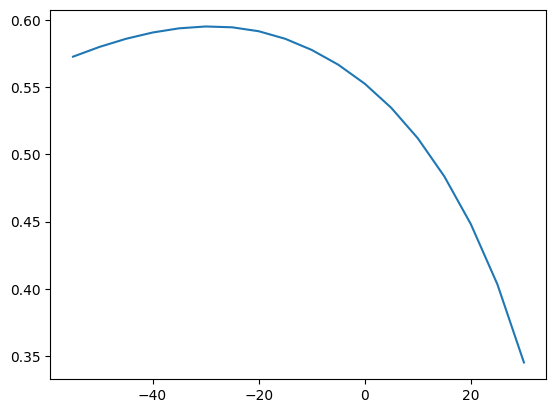

In [27]:
plt.plot(T_evp, Exergy_eff)